In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
# For matrix computation# For m 
import numpy as np
# For data manipulation 
import pandas as pd
# For 2D plotting 
from matplotlib import pyplot as plt
# For 3D plotting 
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LogisticRegression

In [14]:
# Load data set and display first few observations
dataset = pd.read_csv("Cricket.csv",sep=',',encoding='ISO-8859-1')
dataset.head()


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [15]:
dataset.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


In [16]:
dataset.shape

(79, 13)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
Player    79 non-null object
Span      79 non-null object
Mat       79 non-null int64
Inns      79 non-null int64
NO        79 non-null int64
Runs      79 non-null int64
HS        79 non-null object
Ave       79 non-null float64
BF        79 non-null int64
SR        79 non-null float64
100       79 non-null int64
50        79 non-null int64
0         79 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [20]:
x=dataset.iloc[:,2:12]
x.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50
0,463,452,41,18426,200*,44.83,21367,86.23,49,96
1,404,380,41,14234,169,41.98,18048,78.86,25,93
2,375,365,39,13704,164,42.03,17046,80.39,30,82
3,445,433,18,13430,189,32.36,14725,91.20,28,68
4,448,418,39,12650,144,33.37,16020,78.96,19,77


In [21]:
y = dataset.iloc[:,12]
y.head()

0    20
1    15
2    20
3    34
4    28
Name: 0, dtype: int64

In [22]:
x.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mat,79.0,245.075949,74.211716,128.00,188.000,232.00,281.500,463.00
Inns,79.0,230.544304,70.321022,127.00,177.000,217.00,261.500,452.00
NO,79.0,30.037975,14.421710,4.00,17.500,29.00,40.000,70.00
Runs,79.0,7618.139241,2551.873313,5080.00,5759.000,6798.00,8739.500,18426.00
Ave,79.0,38.523291,5.919093,23.57,34.600,37.87,41.845,53.94
BF,79.0,9684.455696,3193.835825,5504.00,7393.500,9134.00,10976.000,21367.00
SR,79.0,79.295316,9.925307,60.57,73.725,77.73,85.180,117.00
100,79.0,11.556962,8.092014,0.00,6.000,10.00,15.500,49.00
50,79.0,46.443038,16.351701,23.00,34.500,42.00,54.000,96.00


In [23]:
x = x.drop(columns = "HS",axis=1)

In [24]:
x.head()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50
0,463,452,41,18426,44.83,21367,86.23,49,96
1,404,380,41,14234,41.98,18048,78.86,25,93
2,375,365,39,13704,42.03,17046,80.39,30,82
3,445,433,18,13430,32.36,14725,91.20,28,68
4,448,418,39,12650,33.37,16020,78.96,19,77


#  2. Standardize all variables

In [26]:
# Standardize feature space to have mean 0 and variance 1
X_std = (x-np.mean(x,axis = 0))/np.std(x,axis = 0)

C:\Users\AKSHAY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


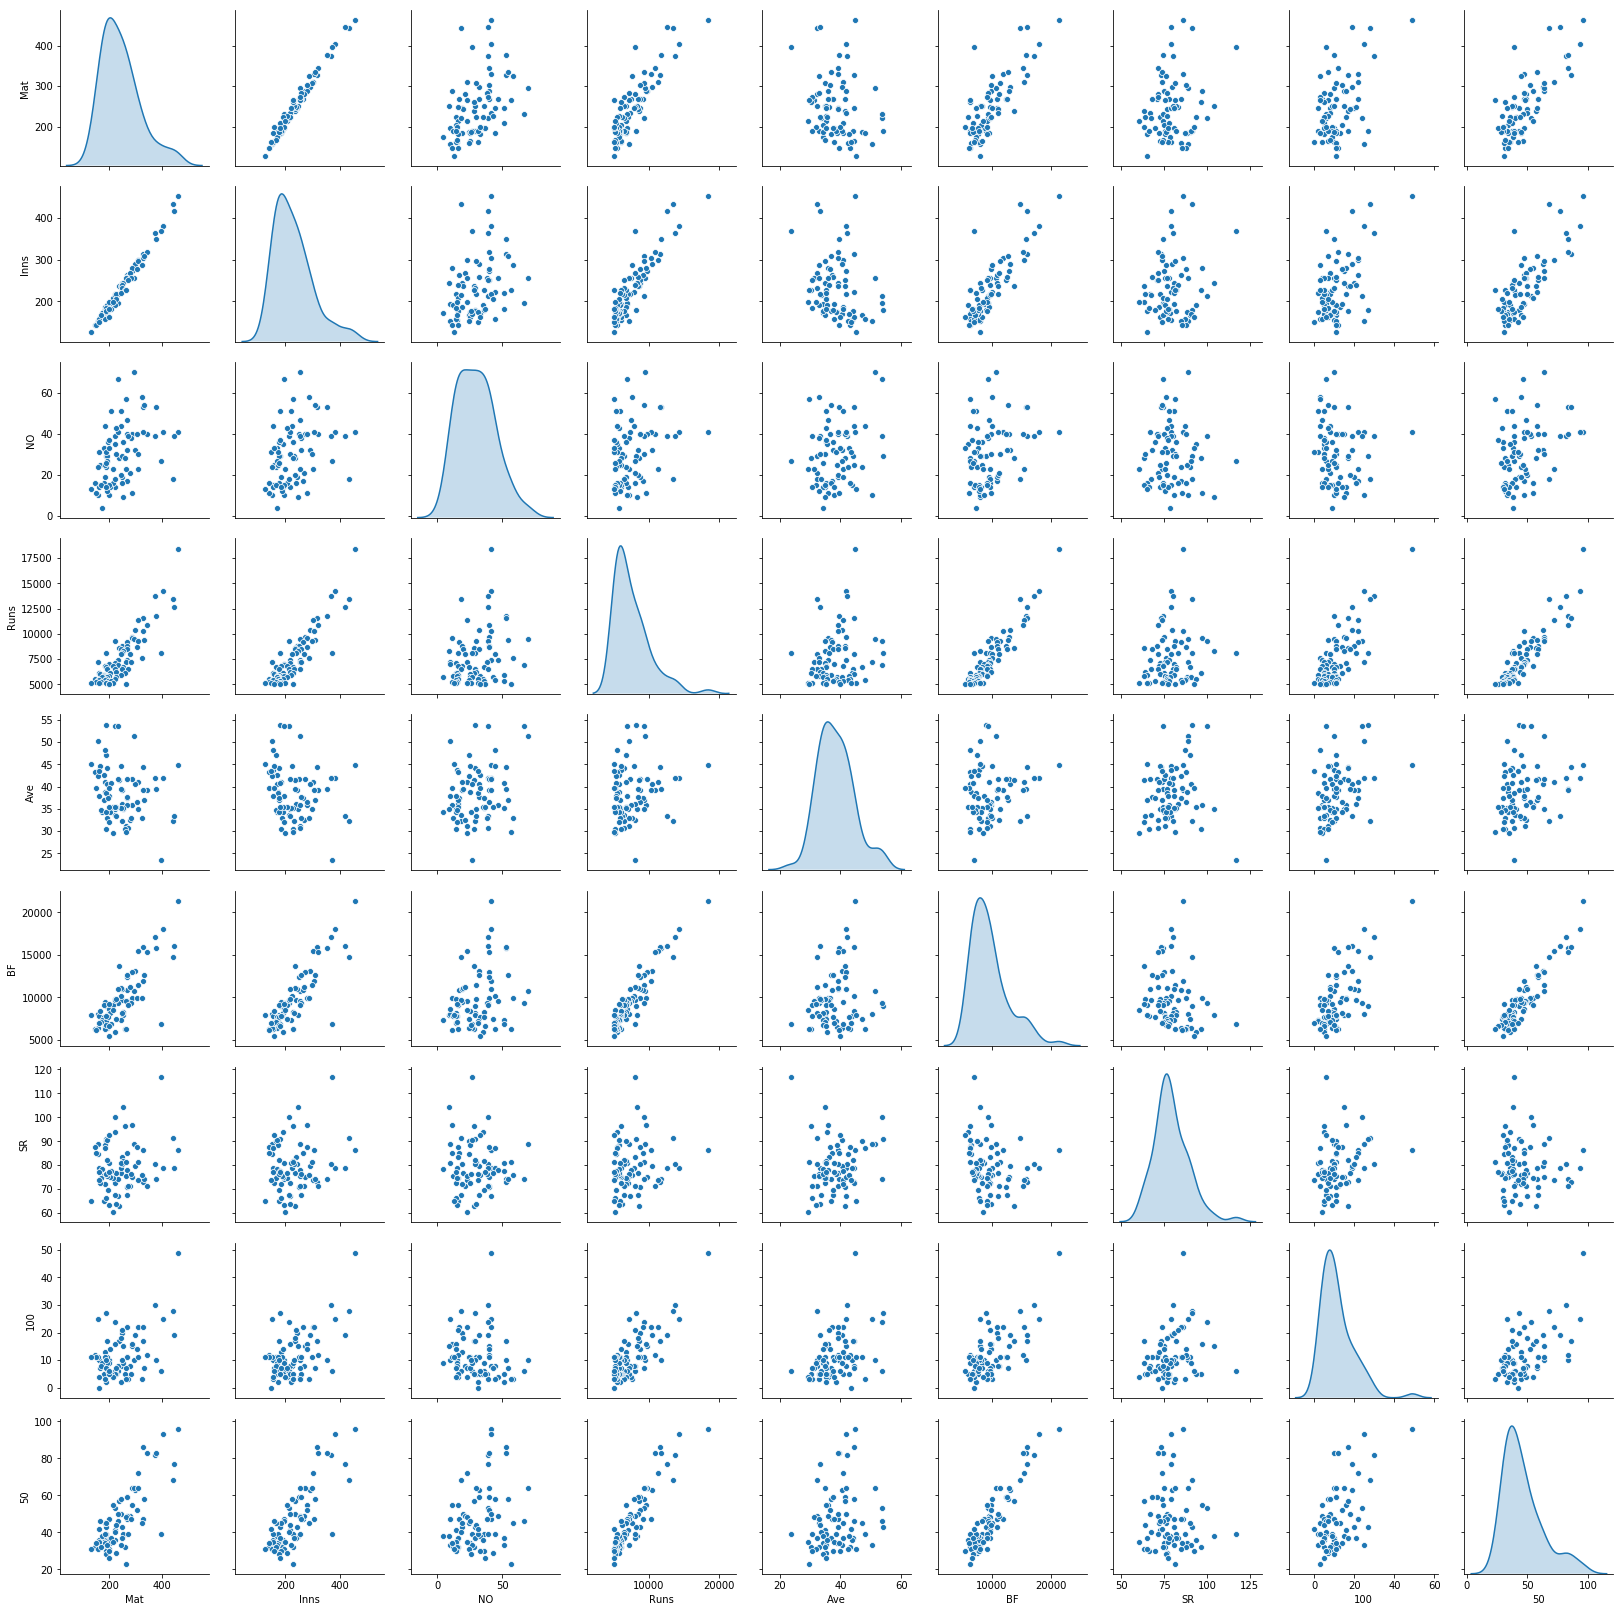

In [28]:
#Now we will visulaise the pair plot for the data
import seaborn as sns
sns.pairplot(x, diag_kind='kde')

#  3. Finding the optimal number of clusters

In [30]:
from sklearn.cluster import KMeans

In [32]:

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init = 10)
    clusters.fit(X_std)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,711.000000
1,2,445.281516
2,3,357.639131
3,4,311.942585
4,5,272.885667
5,6,243.685461
6,7,224.590435
7,8,190.921381
8,9,177.267908
9,10,163.942824


Text(0,0.5,'Cluster Errors')

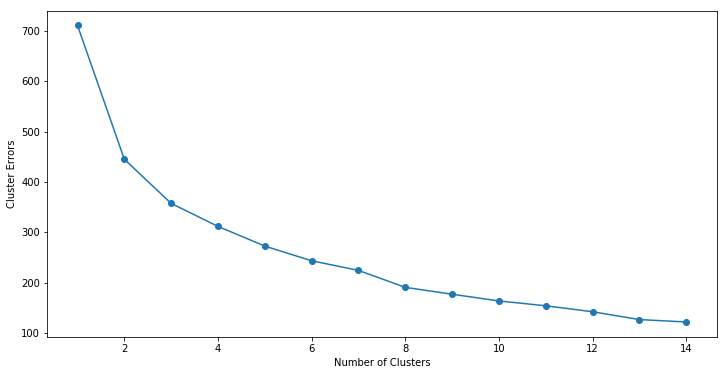

In [33]:
plt.figure(figsize = (12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors,marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Errors')

# Now seeing the Cluster Errors vs Number of Cluster plot, we see that at num_clusters = 5 the graph evens out which means that the optimal number of clusters are 5.

# 4. Perform KMeans Clustering for the data

In [34]:
#Now we will perform KMeans Clustering for the data with number of clusters as 5.
kmeans = KMeans(n_clusters = 5,n_init =15, random_state = 123)

In [35]:
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=15, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [36]:
centroids = kmeans.cluster_centers_

In [38]:
centroids_df= pd.DataFrame(centroids,columns = list(X_std))
centroids_df

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50
0,-0.205802,-0.120850,-0.742350,0.304519,0.722044,-0.084465,1.062095,1.037609,-0.125742
1,0.667451,0.630329,0.892214,0.732249,0.507213,0.919570,-0.369204,0.172152,0.997301
2,-0.822746,-0.787759,-0.591444,-0.721437,-0.059059,-0.619894,-0.337967,-0.422941,-0.623499
3,0.313587,0.192569,0.616092,-0.397031,-0.952356,-0.478156,0.301825,-0.757440,-0.470402
4,2.467084,2.562532,0.388135,2.709603,0.066430,2.444180,0.388620,2.318603,2.262262


In [39]:
kmeans.labels_

array([4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 3, 3, 1, 3, 3, 1, 3, 0, 3, 2, 2, 1, 2, 2, 3, 0, 2,
       3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3])

# 5. Attaching Cluster to each row

In [45]:
dataset['Category'] = pd.DataFrame(kmeans.labels_,columns = ['label'])

In [47]:
dataset.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Category
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,4
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,4
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,4
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,4
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,4


In [50]:
dataset.tail()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Category
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,2
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,2
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,2
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,2
78,Abdul Razzaq (Asia/PAK),1996-2011,265,228,57,5080,112,29.70,6252,81.25,3,23,14,3


# 6. Find out which cluster Chris Gayle Belongs to?

In [51]:
dataset[dataset['Player'] == 'CH Gayle (ICC/WI)'].Category

17    0
Name: Category, dtype: int32

# Chris Gayle Belongs to category zero

# 7.Find out the number of players who are in Gayle Cluster

In [52]:
dataset[dataset['Category']==0].Player

12       AC Gilchrist (AUS/ICC)
15      AB de Villiers (Afr/SA)
17            CH Gayle (ICC/WI)
18            Saeed Anwar (PAK)
23               ME Waugh (AUS)
24    V Sehwag (Asia/ICC/INDIA)
25              V Kohli (INDIA)
26                HH Gibbs (SA)
34                 HM Amla (SA)
42            IVA Richards (WI)
Name: Player, dtype: object

# There are ten players belongs to chris gayle cluster